In [138]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect

In [139]:
#file_path = '../data/helper/df_repos_metadata_stars_greater_7k.json'
#file_path = '../data/helper/df_repos_metadata_stars_range_0_300k.json'
file_path = '../data/helper/df_repos_metadata_stars_smaller_7184.json'
with open(file_path, 'r') as file:
    loaded_data = json.load(file)

In [140]:
df = pd.DataFrame(data=loaded_data)

In [141]:
df.head(3)

,id,name,full_name,html_url,description,url,labels_url,created_at,updated_at,pushed_at,...,open_issues_count,license,allow_forking,topics,visibility,forks,open_issues,watchers,default_branch,score
0,186647681,amundsen,amundsen-io/amundsen,https://github.com/amundsen-io/amundsen,Amundsen is a metadata driven application for ...,https://api.github.com/repos/amundsen-io/amundsen,https://api.github.com/repos/amundsen-io/amund...,2019-05-14T15:12:40Z,2025-04-11T13:09:14Z,2025-04-02T09:02:11Z,...,23,"{'key': 'apache-2.0', 'name': 'Apache License ...",True,"[amundsen, data-catalog, data-discovery, linux...",public,971,23,4553,main,1.0
1,4290214,grequests,spyoungtech/grequests,https://github.com/spyoungtech/grequests,Requests + Gevent = <3,https://api.github.com/repos/spyoungtech/grequ...,https://api.github.com/repos/spyoungtech/grequ...,2012-05-10T21:50:15Z,2025-04-09T13:40:37Z,2024-08-08T21:52:34Z,...,11,"{'key': 'bsd-2-clause', 'name': 'BSD 2-Clause ...",True,[],public,331,11,4552,master,1.0
2,178254323,recon-ng,lanmaster53/recon-ng,https://github.com/lanmaster53/recon-ng,Open Source Intelligence gathering tool aimed ...,https://api.github.com/repos/lanmaster53/recon-ng,https://api.github.com/repos/lanmaster53/recon...,2019-03-28T17:43:52Z,2025-04-11T13:15:57Z,2024-11-01T20:11:51Z,...,27,"{'key': 'gpl-3.0', 'name': 'GNU General Public...",True,[],public,716,27,4550,master,1.0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1050 non-null   int64  
 1   name               1050 non-null   object 
 2   full_name          1050 non-null   object 
 3   html_url           1050 non-null   object 
 4   description        1030 non-null   object 
 5   url                1050 non-null   object 
 6   labels_url         1050 non-null   object 
 7   created_at         1050 non-null   object 
 8   updated_at         1050 non-null   object 
 9   pushed_at          1050 non-null   object 
 10  size               1050 non-null   int64  
 11  stargazers_count   1050 non-null   int64  
 12  watchers_count     1050 non-null   int64  
 13  language           1050 non-null   object 
 14  has_issues         1050 non-null   bool   
 15  has_projects       1050 non-null   bool   
 16  has_downloads      1050 

### analyse if repo is in English

In [143]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "error"

In [144]:
df['language_spoken'] = df['description'].apply(detect_language)

In [145]:
len(df[df['language_spoken'] == 'en'])

914

### analyse numeric values

In [146]:
df.describe()

,id,size,stargazers_count,watchers_count,forks_count,open_issues_count,forks,open_issues,watchers,score
count,1.050000e+03,1.050000e+03,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.0
mean,2.616561e+08,1.888918e+05,5295.945714,5295.945714,857.908571,137.033333,857.908571,137.033333,5295.945714,1.0
std,2.711455e+08,3.195502e+06,958.240904,958.240904,617.768733,282.005030,617.768733,282.005030,958.240904,0.0
min,4.747600e+04,9.000000e+00,3947.000000,3947.000000,87.000000,0.000000,87.000000,0.000000,3947.000000,1.0
25%,4.253267e+07,1.860250e+03,4483.250000,4483.250000,439.000000,26.000000,439.000000,26.000000,4483.250000,1.0
50%,1.414662e+08,9.896500e+03,5105.500000,5105.500000,686.500000,65.000000,686.500000,65.000000,5105.500000,1.0
75%,4.534287e+08,4.952775e+04,6042.000000,6042.000000,1099.000000,143.750000,1099.000000,143.750000,6042.000000,1.0
max,9.548733e+08,1.011714e+08,7183.000000,7183.000000,4740.000000,3867.000000,4740.000000,3867.000000,7183.000000,1.0


In [147]:
df['stargazers_count'].value_counts().sort_index(ascending=False)

stargazers_count
7183    2
7177    2
7162    2
7161    2
7158    2
       ..
3955    1
3952    2
3950    1
3949    1
3947    1
Name: count, Length: 857, dtype: int64

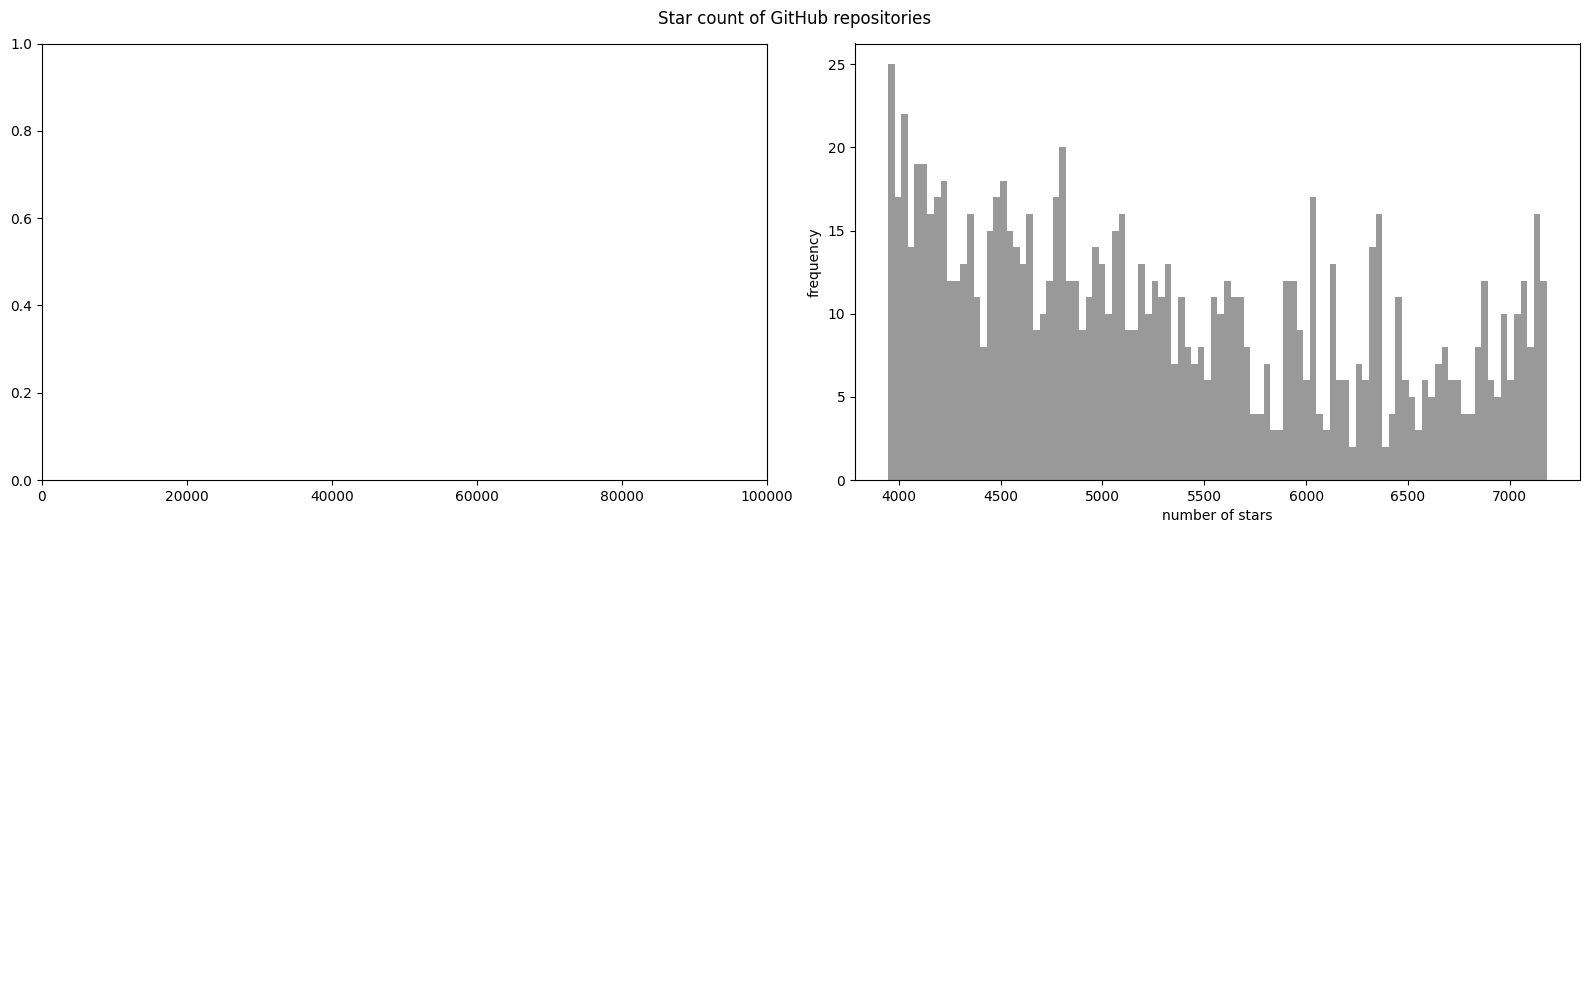

In [ ]:
# number of stars
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=False, sharey=False)
# sharex=True legt fest, ob Skala aller x-Achsen der Subplot gleich ist

# data
ax[0,0].hist(df['stargazers_count'], color='0.4', bins=1000)
ax[0,1].hist(df['stargazers_count'], color='0.6', bins=100)
ax[1,1].axis('off') # plots anordnen
ax[1,0].axis('off')

# title
# ax[0,0].set_title('Stars count of GitHub repositorys - limited to 100,000')
# ax[0,1].set_title('Stars count of GitHub repositorys')

# lable axis x
ax[0,0].set_xlabel('number of stars limited to 100,000')
ax[0,1].set_xlabel('number of stars')

# lable axis y
ax[0,0].set_ylabel('frequency')
ax[0,1].set_ylabel('frequency')

# limitation axis
ax[0,0].set_xlim(0, 100000)

fig.suptitle('Star count of GitHub repositories')
# format of interval between plots
plt.tight_layout()

plt.show()

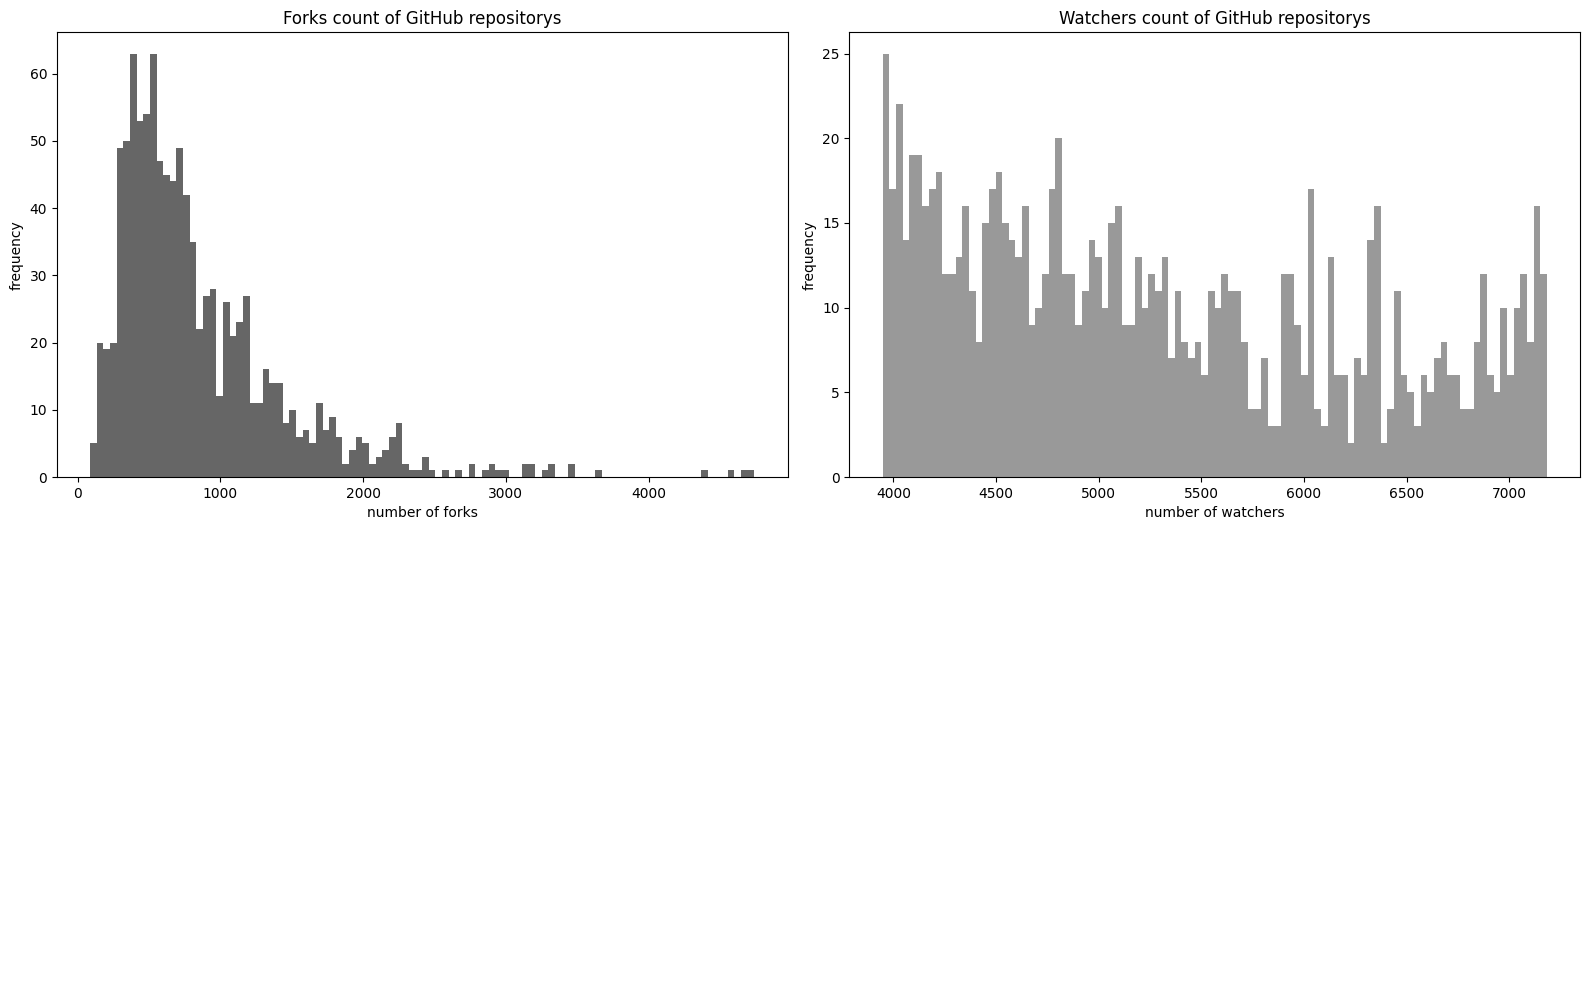

In [149]:
# number of forks & watchers
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,10), sharex=False, sharey=False)
# sharex=True legt fest, ob Skala aller x-Achsen der Subplot gleich ist

# data
ax[0,0].hist(df['forks_count'], color='0.4', bins=100)
ax[0,1].hist(df['watchers_count'], color='0.6', bins=100)
ax[1,1].axis('off') # plots anordnen
ax[1,0].axis('off')

# title
ax[0,0].set_title('Forks count of GitHub repositorys')
ax[0,1].set_title('Watchers count of GitHub repositorys')

# lable axis x
ax[0,0].set_xlabel('number of forks')
ax[0,1].set_xlabel('number of watchers')

# lable axis y
ax[0,0].set_ylabel('frequency')
ax[0,1].set_ylabel('frequency')

# limitation axis
#ax[0,0].set_xlim(0, 100000)

# fig.suptitle('Forks count of GitHub repositories')
# format of interval between plots
plt.tight_layout()

plt.show()

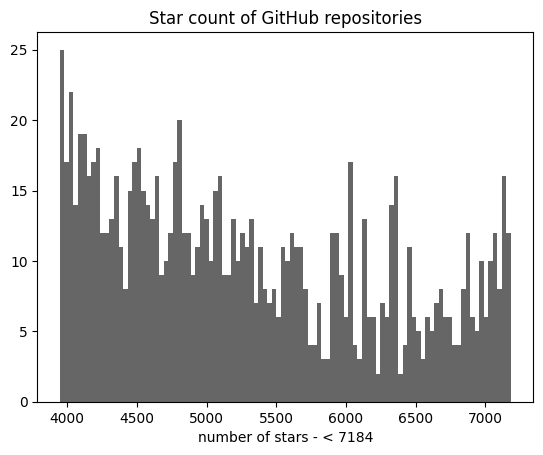

In [158]:
plt.hist(df['stargazers_count'], color='0.4', bins=100)
plt.xlabel('number of stars - < 7184')
plt.title('Star count of GitHub repositories')

plt.show()

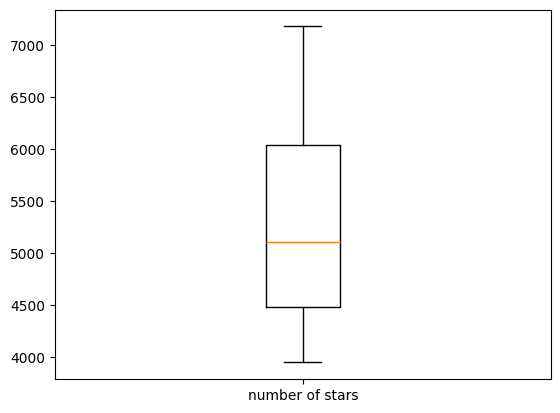

In [150]:
plt.boxplot(df[['stargazers_count']], tick_labels=['number of stars'])

plt.show()